In [1]:
"""
------------------------------------------------------------------------------
libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import mysql.connector
from mysql.connector import Error
import csv
import matplotlib.pyplot as plt
import calplot

In [2]:
"""
------------------------------------------------------------------------------
functions
------------------------------------------------------------------------------
"""

def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection


def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")
        

def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

def execute_query(connection, query, *values):
    cursor = connection.cursor()
    try:
        cursor.execute(query, *values)
        connection.commit()
        #print("Query successful")
    except Error as err:
        #print(f"Error: '{err}'")
        pass
        

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

### SQL data base, tables and data

In [3]:
"""
------------------------------------------------------------------------------
server connection
------------------------------------------------------------------------------
"""

host_name = "localhost"
user_name = "root"
user_password = ""
db_name = "bikestore"

connection = create_server_connection(host_name, user_name, user_password)


MySQL Database connection successful


In [4]:
"""
------------------------------------------------------------------------------
database creation and connection
------------------------------------------------------------------------------
"""

create_database_query = "CREATE DATABASE IF NOT EXISTS bikestore"
create_database(connection, create_database_query)

#connection to database
connection = create_db_connection(host_name, user_name, user_password, db_name)


Database created successfully
MySQL Database connection successful


In [5]:
"""
------------------------------------------------------------------------------
tables
------------------------------------------------------------------------------
"""

create_brands_table = """
CREATE TABLE IF NOT EXISTS brands(
		brand_id INT PRIMARY KEY,
        brand_name VARCHAR(50)
        );
 """
execute_query(connection, create_brands_table)

create_categories_table = """
CREATE TABLE IF NOT EXISTS categories(
		category_id INT PRIMARY KEY,
        category_name VARCHAR(50) NOT NULL
        );
 """
execute_query(connection, create_categories_table)


create_customers_table = """
CREATE TABLE IF NOT EXISTS customers(
		customer_id INT AUTO_INCREMENT PRIMARY KEY,
        first_name VARCHAR(50) NOT NULL,
        last_name VARCHAR(50) NOT NULL,
        phone VARCHAR(20),
        email VARCHAR(50) NOT NULL,
        street VARCHAR(50) NOT NULL,
        city VARCHAR(50) NOT NULL,
        state VARCHAR(10) NOT NULL,
        zip_code VARCHAR(10)
        );
 """
execute_query(connection, create_customers_table)

create_stores_table = """
CREATE TABLE IF NOT EXISTS stores(
		store_id INT PRIMARY KEY,
        store_name VARCHAR(50),
        phone VARCHAR(20) NOT NULL,
        email VARCHAR(50) NOT NULL,
        street VARCHAR(50) NOT NULL,
        city VARCHAR(50) NOT NULL,
        state VARCHAR(10) NOT NULL,
        zip_code VARCHAR(10)
        );
 """
execute_query(connection, create_stores_table)

create_staffs_table = """
CREATE TABLE IF NOT EXISTS staffs(
		staff_id INT AUTO_INCREMENT PRIMARY KEY,
        first_name VARCHAR(50) NOT NULL,
        last_name VARCHAR(50) NOT NULL,
        email VARCHAR(50) NOT NULL,
        phone VARCHAR(20) NOT NULL,
        active INT NOT NULL,
        store_id INT NOT NULL,
        manager_id INT,
        FOREIGN KEY(store_id) REFERENCES stores(store_id)
        );
 """
execute_query(connection, create_staffs_table)


create_orders_table = """
CREATE TABLE IF NOT EXISTS orders(
		order_id INT AUTO_INCREMENT PRIMARY KEY,
        customer_id INT NOT NULL,
        order_status INT NOT NULL,
        order_date DATE NOT NULL,
        required_date DATE NOT NULL,
        shipped_date DATE,
        store_id INT NOT NULL,
        staff_id INT NOT NULL,
        FOREIGN KEY(customer_id) REFERENCES customers(customer_id),
        FOREIGN KEY(store_id) REFERENCES stores(store_id),
        FOREIGN KEY(staff_id) REFERENCES staffs(staff_id)
        );
 """
execute_query(connection, create_orders_table)

create_order_items_table = """
CREATE TABLE IF NOT EXISTS order_items(
		order_id INT NOT NULL,
        item_id INT NOT NULL,
        product_id INT NOT NULL,
        quantity INT NOT NULL,
        list_price DECIMAL(6,2),
        discount DECIMAL(3,2),
        PRIMARY KEY(order_id, item_id)
        );
 """
execute_query(connection, create_order_items_table)


create_products_table = """
CREATE TABLE IF NOT EXISTS products(
		product_id INT AUTO_INCREMENT PRIMARY KEY,
        product_name VARCHAR(100) NOT NULL,
        brand_id INT NOT NULL,
        category_id INT NOT NULL,
        model_year INT NOT NULL,
        list_price DECIMAL(6,2),
        FOREIGN KEY(brand_id) REFERENCES brands(brand_id),
        FOREIGN KEY(category_id) REFERENCES categories(category_id)
        );
 """
execute_query(connection, create_products_table)


create_stocks_table = """
CREATE TABLE IF NOT EXISTS stocks(
		store_id INT NOT NULL,
        product_id INT NOT NULL,
        quantity INT NOT NULL,
        PRIMARY KEY(store_id, product_id)
        );
 """
execute_query(connection, create_stocks_table)

In [6]:
"""
------------------------------------------------------------------------------
adding data from csv.-files
------------------------------------------------------------------------------
"""

#connection to database
connection = create_db_connection(host_name, user_name, user_password, db_name)

#brands
with open("./csv/brands.csv", newline= "") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header
    
    for row in reader:
        values = (row[0], row[1])

        #INSERT
        query = "INSERT IGNORE INTO brands(brand_id, brand_name) \
        VALUES (%s, %s)"

        execute_query(connection, query, values)

MySQL Database connection successful


In [7]:
#categories
with open("./csv/categories.csv", newline= "") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header
    
    for row in reader:
        values = (row[0], row[1])
        
        #INSERT
        query = f"INSERT IGNORE INTO categories(category_id, category_name) \
        VALUES(%s, %s)"
        
        execute_query(connection, query, values)

In [8]:
#customers
with open("./csv/customers.csv", newline= "") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header
    
    for row in reader:
        values = (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8])
    
        #INSERT
        query = f"INSERT IGNORE INTO customers(customer_id, first_name, last_name, phone, email, street, city, state, zip_code) \
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
        
        
        execute_query(connection, query, values)



In [9]:
#stores
with open("./csv/stores.csv", newline= "") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header
    
    for row in reader:
        values = (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7])
        
        #INSERT
        query = f"INSERT IGNORE INTO stores(store_id, store_name, phone, email, street, city, state, zip_code) \
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
        
        
        execute_query(connection, query, values)

In [10]:
#staffs
with open("./csv/staffs.csv", newline= "") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header
    
    for row in reader:
        values = (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7])
        
        #INSERT
        query = f"INSERT IGNORE INTO staffs(staff_id, first_name, last_name, email, phone, active, store_id, manager_id) \
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
        
        execute_query(connection, query, values)

In [11]:
query = f"INSERT IGNORE INTO staffs(staff_id, first_name, last_name, email, phone, active, store_id, manager_id) \
VALUES (1, 'Fabiola', 'Jackson', 'fabiola.jackson@bikes.shop', '(831) 555-5554', '1', '1', NULL)"

execute_query(connection, query)

In [12]:
#orders
with open("./csv/orders.csv", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header
    
    for row in reader:
        values = (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7])
        
        #INSERT
        query = f"INSERT IGNORE INTO orders(order_id, customer_id, order_status, order_date, required_date, shipped_date, store_id, staff_id) \
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"

        
        execute_query(connection, query, values)


In [13]:
#order_items
with open("./csv/order_items.csv", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header
    
    for row in reader:
        values = (row[0], row[1], row[2], row[3], row[4], row[5])
        
        #INSERT
        query = f"INSERT IGNORE INTO order_items(order_id, item_id, product_id, quantity, list_price, discount) \
        VALUES (%s, %s, %s, %s, %s, %s)"
        
        execute_query(connection, query, values)

In [14]:
#products
with open("./csv/products.csv", newline= "") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header 
    
    for row in reader:
        values = (row[0], row[1], row[2], row[3], row[4], row[5])
        
        #INSERT
        query = f"INSERT IGNORE INTO products(product_id, product_name, brand_id, category_id, model_year, list_price) \
        VALUES (%s, %s, %s, %s, %s, %s)"
        
        execute_query(connection, query, values)

In [15]:
#stocks
with open("./csv/stocks.csv", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  #Skip the header
    
    for row in reader:
        values = (row[0], row[1], row[2])
        
        #INSERT
        query = f"INSERT IGNORE INTO stocks(store_id, product_id, quantity) \
        VALUES (%s, %s, %s)"
        
        execute_query(connection, query, values)

### SELECT queries and exploratory analysis

In [16]:
"""
------------------------------------------------------------------------------
SELECT
------------------------------------------------------------------------------
"""

#Overview customers and orders

q1 = """
SELECT 
    c.customer_id, 
    c.first_name, 
    c.last_name, 
    c.state, 
    p.product_name, 
    ca.category_name, 
    oi.list_price,
    oi.discount,
    o.order_id,
    o.order_date,
    oi.quantity,
    ROUND(oi.quantity * (oi.list_price - (oi.list_price*oi.discount)),2) AS total_revenue
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
JOIN categories ca ON p.category_id = ca.category_id
GROUP BY 
    c.customer_id, 
    p.product_name, 
    ca.category_name
ORDER BY 
    customer_id, 
    order_date;
 """

results = read_query(connection, q1)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Customer id", "First_name", "Last_name", "State", "Product", "Category", "List_price", "Discount", "Order_id", "Order_date", "Quantity", "Total_revenue"]
df1 = pd.DataFrame(result_list, columns=columns)

df1.head(15)

,Customer id,First_name,Last_name,State,Product,Category,List_price,Discount,Order_id,Order_date,Quantity,Total_revenue
0,1,Debra,Burks,NY,Surly Straggler - 2016,Cyclocross Bicycles,1549.00,0.10,599,2016-12-09,2,2788.20
1,1,Debra,Burks,NY,Electra Girl_s Hawaii 1 (20-inch) - 2015/2016,Children Bicycles,299.99,0.07,599,2016-12-09,1,278.99
2,1,Debra,Burks,NY,Trek Conduit+ - 2016,Electric Bikes,2999.99,0.05,599,2016-12-09,2,5699.98
3,1,Debra,Burks,NY,Electra Girl_s Hawaii 1 (16-inch) - 2015/2016,Children Bicycles,269.99,0.20,599,2016-12-09,2,431.98
4,1,Debra,Burks,NY,Trek Domane SLR Disc Frameset - 2018,Road Bikes,3199.99,0.20,1555,2018-04-18,1,2559.99
5,1,Debra,Burks,NY,Electra Townie Original 21D - 2016,Comfort Bicycles,549.99,0.10,1555,2018-04-18,2,989.98
6,1,Debra,Burks,NY,Trek Domane SL Frameset - 2018,Road Bikes,6499.99,0.10,1555,2018-04-18,1,5849.99
7,1,Debra,Burks,NY,Surly Big Fat Dummy Frameset - 2018,Mountain Bikes,469.99,0.10,1555,2018-04-18,1,422.99
8,1,Debra,Burks,NY,Surly ECR 27.5 - 2018,Mountain Bikes,1899.00,0.05,1555,2018-04-18,2,3608.10
9,1,Debra,Burks,NY,Trek Domane SL 7 Women_s - 2018,Road Bikes,4999.99,0.07,1613,2018-11-18,1,4649.99


In [17]:
#Top 5 profitable customers

q2 = """
SELECT 
    c.customer_id, 
    c.first_name, 
    c.last_name, 
    c.state,
    SUM(oi.quantity) AS quantity,
    SUM(ROUND(oi.quantity * (oi.list_price * (1 - oi.discount)), 2)) AS sum_total_revenue,
    COUNT(DISTINCT o.order_id) AS order_count
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id
ORDER BY sum_total_revenue DESC
LIMIT 5;
 """

results = read_query(connection, q2)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Customer_id", "First_name", "Last_name", "State", "Quantity", "Sum_total_revenue", "No_of_orders"]
df2 = pd.DataFrame(result_list, columns=columns)

df2

,Customer_id,First_name,Last_name,State,Quantity,Sum_total_revenue,No_of_orders
0,94,Sharyn,Hopkins,NY,15,34807.93,2
1,75,Abby,Gamble,NY,11,32802.99,2
2,6,Lyndsey,Bean,NY,16,32675.06,3
3,16,Emmitt,Sanchez,NY,19,31925.87,3
4,73,Melanie,Hayes,NY,12,31913.68,2


In [18]:
#Number of products per category

q3 = """
SELECT 
    ca.category_id, 
    ca.category_name,
    COUNT(DISTINCT p.product_name) AS no_of_products
FROM products p
JOIN categories ca ON p.category_id = ca.category_id
GROUP BY category_id
ORDER BY category_id;
 """

results = read_query(connection, q3)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Category_id", "Category", "No_of_products"]
df3 = pd.DataFrame(result_list, columns=columns)

df3

,Category_id,Category,No_of_products
0,1,Children Bicycles,59
1,2,Comfort Bicycles,30
2,3,Cruisers Bicycles,78
3,4,Cyclocross Bicycles,10
4,5,Electric Bikes,24
5,6,Mountain Bikes,60
6,7,Road Bikes,60


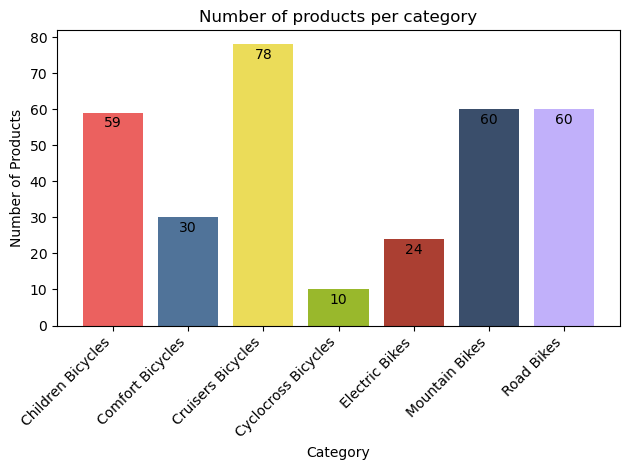

In [19]:
#Barplot: bike categories and number of products

#barplot
colors = ["#EB615F", "#507399", "#EBDC59", "#99B82C", "#AB3F32", "#3A4E6B", "#C1B0FA"]
plt.bar(df3["Category"], df3["No_of_products"], color = colors)

#number on top of bars
#index i as the x-coordinate to position the text at the center of each bar
for i, num in enumerate(df3["No_of_products"]):
    plt.text(i, num - 1, str(num), ha= "center", va="top")

#title and labels
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Number of products per category")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout()
plt.show()



In [20]:
#Sold items and revenue per category

q4 = """
SELECT
    ca.category_id,
    ca.category_name,
    SUM((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_revenue,
    SUM(oi.quantity) AS sold_items
FROM 
    order_items oi
    INNER JOIN products p ON oi.product_id = p.product_id
    INNER JOIN categories ca ON p.category_id = ca.category_id
GROUP BY category_id
ORDER BY category_id;

    """

results = read_query(connection, q4)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Category_id", "Category", "Total_revenue", "Sold_items"]
df4 = pd.DataFrame(result_list, columns=columns)

df4

,Category_id,Category,Total_revenue,Sold_items
0,1,Children Bicycles,292189.1982,1179
1,2,Comfort Bicycles,394020.0981,813
2,3,Cruisers Bicycles,995032.6237,2063
3,4,Cyclocross Bicycles,711011.8359,394
4,5,Electric Bikes,916684.7800,315
5,6,Mountain Bikes,2715079.5337,1755
6,7,Road Bikes,1656038.4880,559


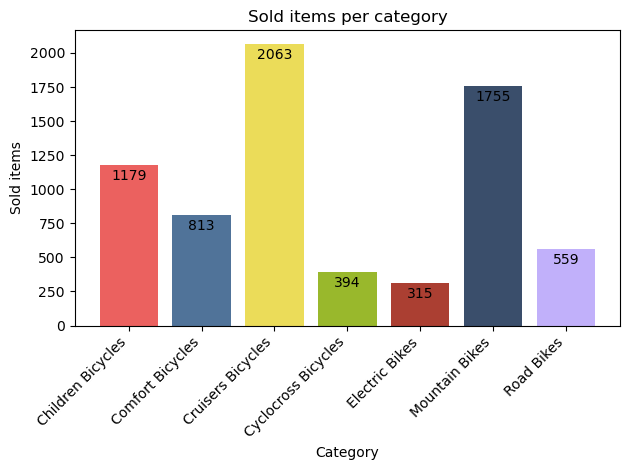

In [21]:
#Barplot: sold items per category

#barplot
colors = ["#EB615F", "#507399", "#EBDC59", "#99B82C", "#AB3F32", "#3A4E6B", "#C1B0FA"]
plt.bar(df4["Category"], df4["Sold_items"], color = colors)

#number on top of bars
#index i as the x-coordinate to position the text at the center of each bar
for i, items in enumerate(df4["Sold_items"]):
    plt.text(i, items - 30, str(items), ha= "center", va="top")

#title and labels
plt.xlabel("Category")
plt.ylabel("Sold items")
plt.title("Sold items per category")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout()
plt.show()

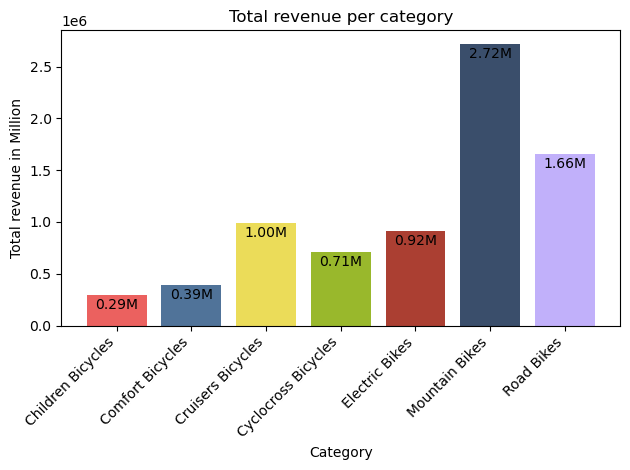

In [22]:
#Barplot: revenue per category

#barplot
colors = ["#EB615F", "#507399", "#EBDC59", "#99B82C", "#AB3F32", "#3A4E6B", "#C1B0FA"]
plt.bar(df4["Category"], df4["Total_revenue"], color = colors)

#number on top of bars
#index i as the x-coordinate to position the text at the center of each bar
for i, revenue in enumerate(df4["Total_revenue"]):
    plt.text(i, revenue -30000, f"{revenue/1_000_000:.2f}M", ha= "center", va="top")

#title and labels
plt.xlabel("Category")
plt.ylabel("Total revenue in Million")
plt.title("Total revenue per category")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [23]:
#AVG list price per category

q5 = """
SELECT 
    ca.category_id,
    ca.category_name, 
    ROUND(AVG(oi.list_price)) AS AVG_list_price
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories ca ON p.category_id = ca.category_id
GROUP BY ca.category_id
ORDER BY category_id; 
"""


results = read_query(connection, q5)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Category_id", "Category", "AVG_list_price"]
df5 = pd.DataFrame(result_list, columns=columns)

df5

,Category_id,Category,AVG_list_price
0,1,Children Bicycles,279
1,2,Comfort Bicycles,539
2,3,Cruisers Bicycles,540
3,4,Cyclocross Bicycles,2030
4,5,Electric Bikes,3198
5,6,Mountain Bikes,1726
6,7,Road Bikes,3287


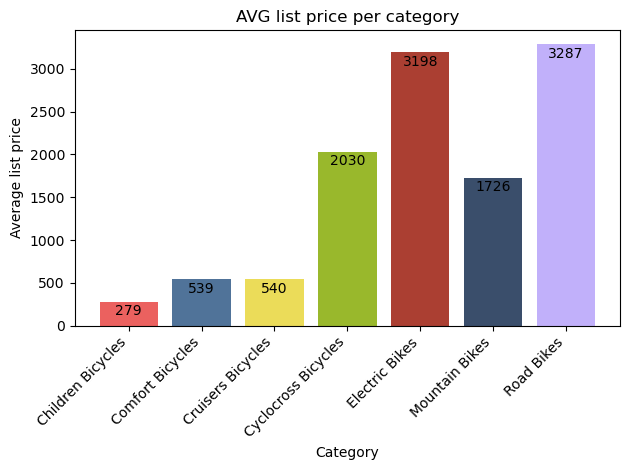

In [24]:
#Barplot: AVG list price per category

#barplot
colors = ["#EB615F", "#507399", "#EBDC59", "#99B82C", "#AB3F32", "#3A4E6B", "#C1B0FA"]
plt.bar(df5["Category"], df5["AVG_list_price"], color = colors)

#number on top of bars
#index i as the x-coordinate to position the text at the center of each bar
for i, price in enumerate(df5["AVG_list_price"]):
    plt.text(i, price -30, str(price), ha= "center", va="top")

#title and labels
plt.xlabel("Category")
plt.ylabel("Average list price")
plt.title("AVG list price per category")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [25]:
#Orders per store and month

q6 = """
SELECT 
    COUNT(order_id) AS orders,
    MONTH(order_date) AS month,
    store_id
FROM orders
GROUP BY store_id, month;
"""


results = read_query(connection, q6)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Orders", "Month", "Store_id"]
df6 = pd.DataFrame(result_list, columns=columns)

df6

    

,Orders,Month,Store_id
0,37,1,1
1,28,2,1
2,34,3,1
3,70,4,1
4,22,5,1
5,18,6,1
6,16,7,1
7,24,8,1
8,25,9,1
9,28,10,1


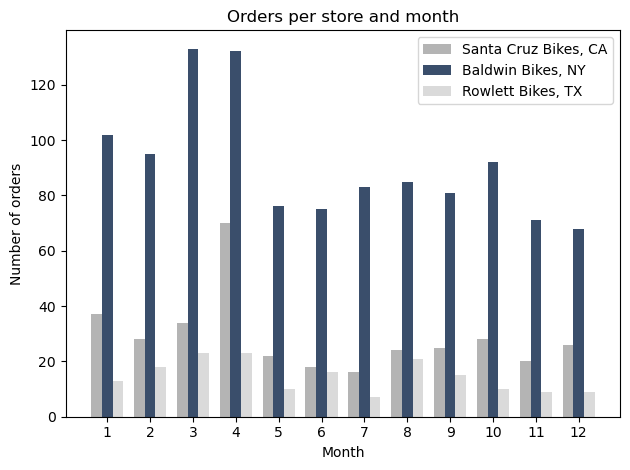

In [26]:
#Barplots: orders per store and month
#colors = ["#65A1EB", "#507399", "#3A4E6B"]
colors = ["#b4b4b4","#3A4E6B", "#dadada"]
bar_width = 0.25 
index = range(1, 13)

orders_1 = df6["Orders"].iloc[:12]
orders_2 = df6["Orders"].iloc[12:24]
orders_3 = df6["Orders"].iloc[24:]

#three bars
plt.bar(index, orders_1, width= bar_width, color= colors[0], label= "Santa Cruz Bikes, CA")
plt.bar([i + bar_width for i in index], orders_2  , width= bar_width, color= colors[1], label= "Baldwin Bikes, NY")
plt.bar([i + 2 * bar_width for i in index], orders_3, width= bar_width, color= colors[2], label= "Rowlett Bikes, TX")

#Title and labels
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.title("Orders per store and month")
plt.xticks([i + bar_width for i in index], index) 
plt.legend() 
plt.tight_layout()
plt.show()

In [27]:
#Orders per order date

q7 = """
SELECT 
    order_date,
    COUNT(order_id) AS orders
FROM orders
GROUP BY order_date;
"""


results = read_query(connection, q7)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Order_date", "Orders"]
df7 = pd.DataFrame(result_list, columns=columns)

df7

,Order_date,Orders
0,2016-01-01,2
1,2016-01-02,1
2,2016-01-03,2
3,2016-01-04,3
4,2016-01-05,3
...,...,...
720,2018-09-06,1
721,2018-10-21,1
722,2018-11-18,1
723,2018-11-28,1


In [28]:
colormaps = plt.colormaps()
print(colormaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

(<Figure size 1250x510 with 4 Axes>,
 array([<AxesSubplot: ylabel='2016'>, <AxesSubplot: ylabel='2017'>,
        <AxesSubplot: ylabel='2018'>], dtype=object))

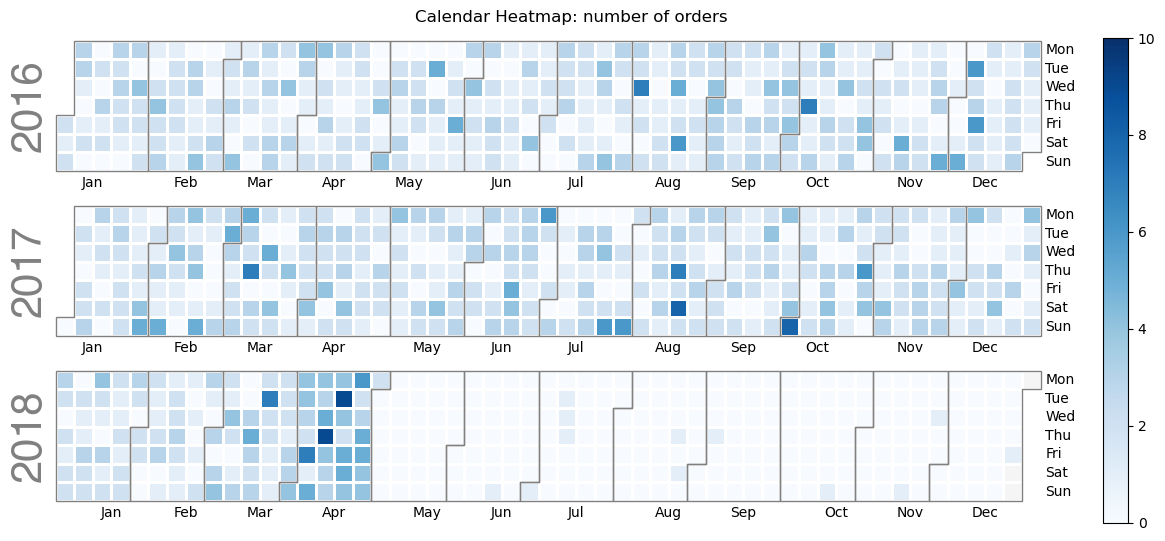

In [29]:
#Calender heat map

#datetime
df7["Order_date"] = pd.to_datetime(df7["Order_date"])

#set datetime as index
df7.set_index("Order_date", inplace=True)

calplot.calplot(df7["Orders"], cmap= "Blues", suptitle="Calendar Heatmap: number of orders", colorbar=True, vmin=0, vmax=10)

In [30]:
#Number of orders per month

q8 = """
SELECT 
    MONTH(order_date) AS month,
    COUNT(order_id) AS orders
FROM orders
GROUP BY month;
"""



results = read_query(connection, q8)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Month", "Number_of_orders"]
df8 = pd.DataFrame(result_list, columns=columns)

df8

,Month,Number_of_orders
0,1,152
1,2,141
2,3,190
3,4,225
4,5,108
5,6,109
6,7,106
7,8,130
8,9,121
9,10,130


In [31]:
#Revenue development of the three most profitable bike categories from 2016 to 2018

q9 = """
SELECT
    YEAR(o.order_date) AS year,
    p.category_id,
    ca.category_name,
    SUM((oi.quantity * oi.list_price) * (1 - oi.discount)) AS revenue
FROM order_items oi
INNER JOIN orders o ON oi.order_id = o.order_id
INNER JOIN products p ON oi.product_id = p.product_id
INNER JOIN categories ca ON p.category_id = ca.category_id
GROUP BY ca.category_id, year
HAVING ca.category_id IN (5, 6, 7)
ORDER BY year, ca.category_id;

"""


results = read_query(connection, q9)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Year", "Category_id", "Category", "Total_revenue"]
df9 = pd.DataFrame(result_list, columns=columns)

df9

,Year,Category_id,Category,Total_revenue
0,2016,5,Electric Bikes,280169.0661
1,2016,6,Mountain Bikes,1189282.3987
2,2017,5,Electric Bikes,292075.1238
3,2017,6,Mountain Bikes,1120941.6744
4,2017,7,Road Bikes,1046078.0864
5,2018,5,Electric Bikes,344440.5901
6,2018,6,Mountain Bikes,404855.4606
7,2018,7,Road Bikes,609960.4016


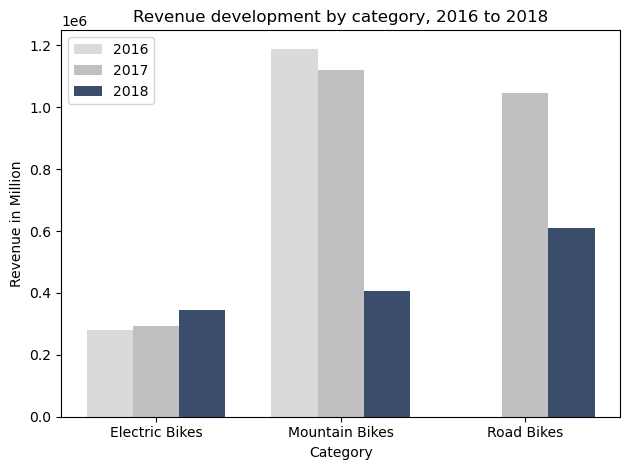

In [32]:
#Barplots: Revenue development of the three most profitable bike categories from 2016 to 2018
colors = ["#dadada", "#c0c0c0", "#3A4E6B"]
bar_width = 0.25 
category = ["Electric Bikes", "Mountain Bikes", "Road Bikes"]
index = range(len(category))


revenue_2016 = df9["Total_revenue"].iloc[:2].tolist() + [0] #no value for road bikes in 2016
revenue_2017 = df9["Total_revenue"].iloc[2:5]
revenue_2018 = df9["Total_revenue"].iloc[5:]


#three bars
plt.bar(index, revenue_2016 , width= bar_width, color= colors[0], label= "2016")
plt.bar([i + bar_width for i in index], revenue_2017 , width= bar_width, color= colors[1], label= "2017")
plt.bar([i + 2 * bar_width for i in index], revenue_2018, width= bar_width, color= colors[2], label= "2018")


#Title and labels
plt.xlabel("Category")
plt.ylabel("Revenue in Million")
plt.title("Revenue development by category, 2016 to 2018")
plt.xticks([i + bar_width for i in index], category) 
plt.legend() 
plt.tight_layout()
plt.show()

In [33]:
#Late deliveries

q10 = """
WITH deliveries AS(
  SELECT 
    order_date,
    order_id,
    CASE WHEN shipped_date > required_date THEN 1
         ELSE 0
         END AS late_delivery
  FROM orders)
    
SELECT
    MONTH(order_date) AS month,
    ROUND(SUM(late_delivery) / COUNT(order_id) * 100) AS perc_late_delivery
    FROM deliveries
    GROUP BY month;
"""


results = read_query(connection, q10)

#Returns a list of lists and then creates a pandas DataFrame
result_list = []

for result in results:
  result = list(result)
  result_list.append(result)


columns = ["Month", "Perc_late_deliveries"]
df10 = pd.DataFrame(result_list, columns=columns)

df10.head(20)


,Month,Perc_late_deliveries
0,1,35
1,2,32
2,3,35
3,4,17
4,5,27
5,6,27
6,7,33
7,8,25
8,9,22
9,10,32


In [34]:
def color_map(value):
    if value < 20:
        return "background-color: #507399"
    elif value < 30:
        return "background-color: #C2AC04"
    else:
        return "background-color: #AB3F32"
    
  

#Data Frame with color map, styler by pandas
colored_df = df10.style.applymap(color_map,  subset=["Perc_late_deliveries"])

colored_df

,Month,Perc_late_deliveries
0,1,35
1,2,32
2,3,35
3,4,17
4,5,27
5,6,27
6,7,33
7,8,25
8,9,22
9,10,32
